In [1]:
import nilearn.plotting as plotting
import nilearn.image as img
from nilearn.glm import threshold_stats_img
from nilearn.reporting import get_clusters_table
import glob
from decouple import config
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

In [2]:
task ='fear'
participant = 'G1010'
path = config(task)

In [10]:
t_images = glob.glob(os.path.join(path, "1stlevel", 'T1',"sub-*", "spmT_0001.nii" ))
dof = glob.glob(os.path.join(path, "1stlevel", 'T1',"sub-*", "beta*.nii" ))
ant_img = img.load_img(f'{path}/preprocessed_t1/sub-{participant}/anat/sub-{participant}_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz')
subject_con_image = [scan for scan in t_images if participant in scan][0]
dof = 183 - len([scan for scan in dof if participant in scan]) 
img_prep = img.load_img(subject_con_image) 

# SPM style thresholding
thresholded_map1, threshold1 = threshold_stats_img(
    img_prep,
    threshold=3.14,
    alpha=.001,
    height_control='fpr',
    cluster_threshold=0,
    two_sided=True,
)

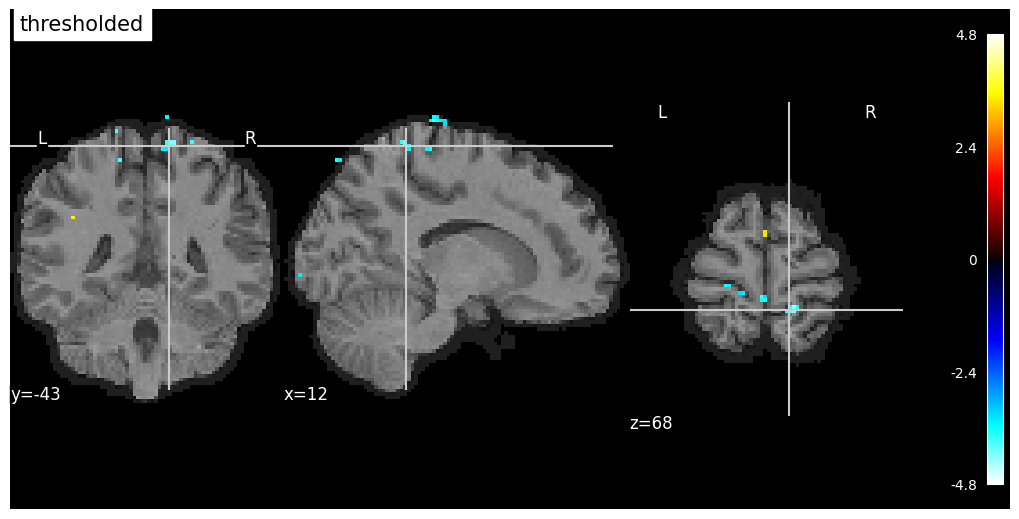

In [4]:
fig = plt.figure(figsize=(10, 5))
plotting.plot_stat_map(
    thresholded_map1,
    bg_img=ant_img,
    threshold=0.0,
    figure=fig,
    black_bg=True,
    title="thresholded"
)

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



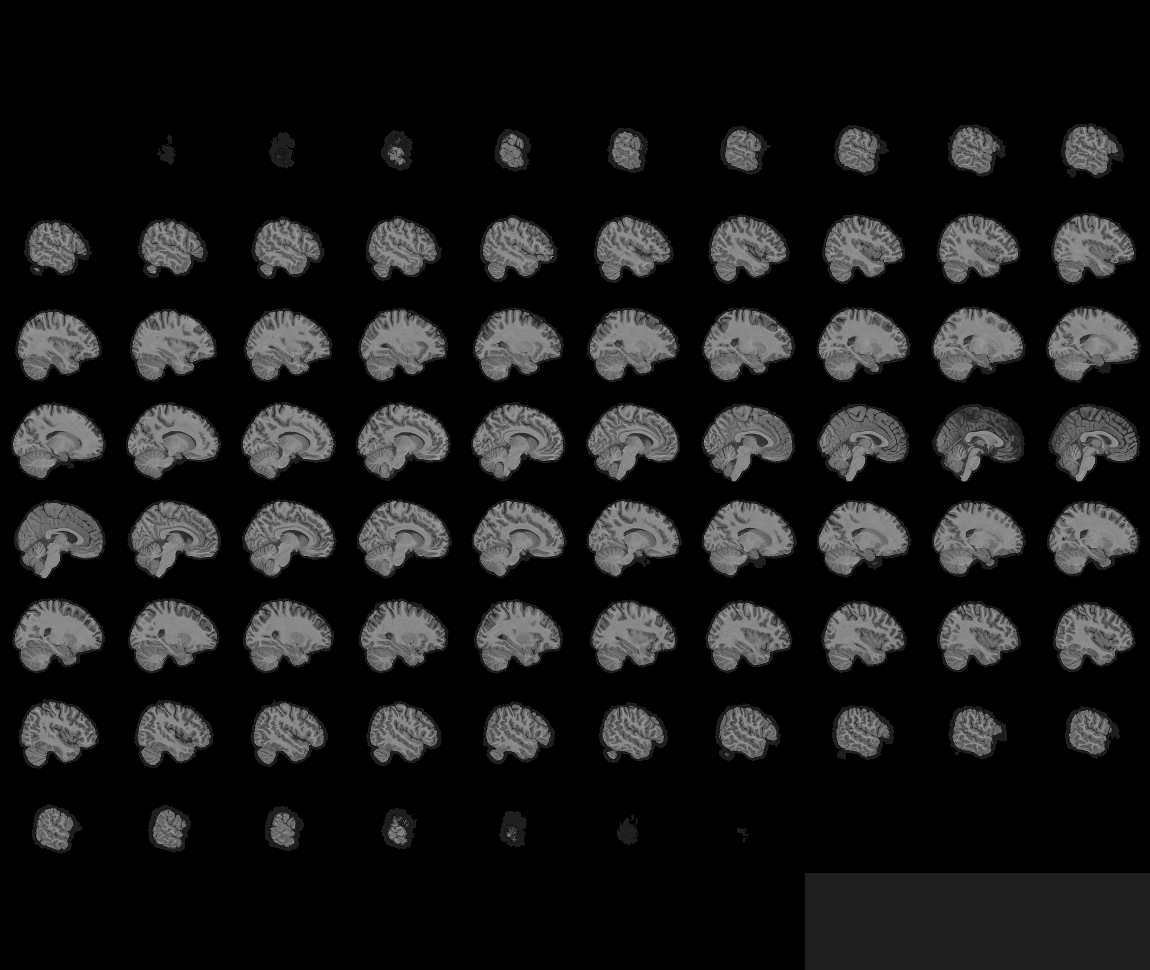
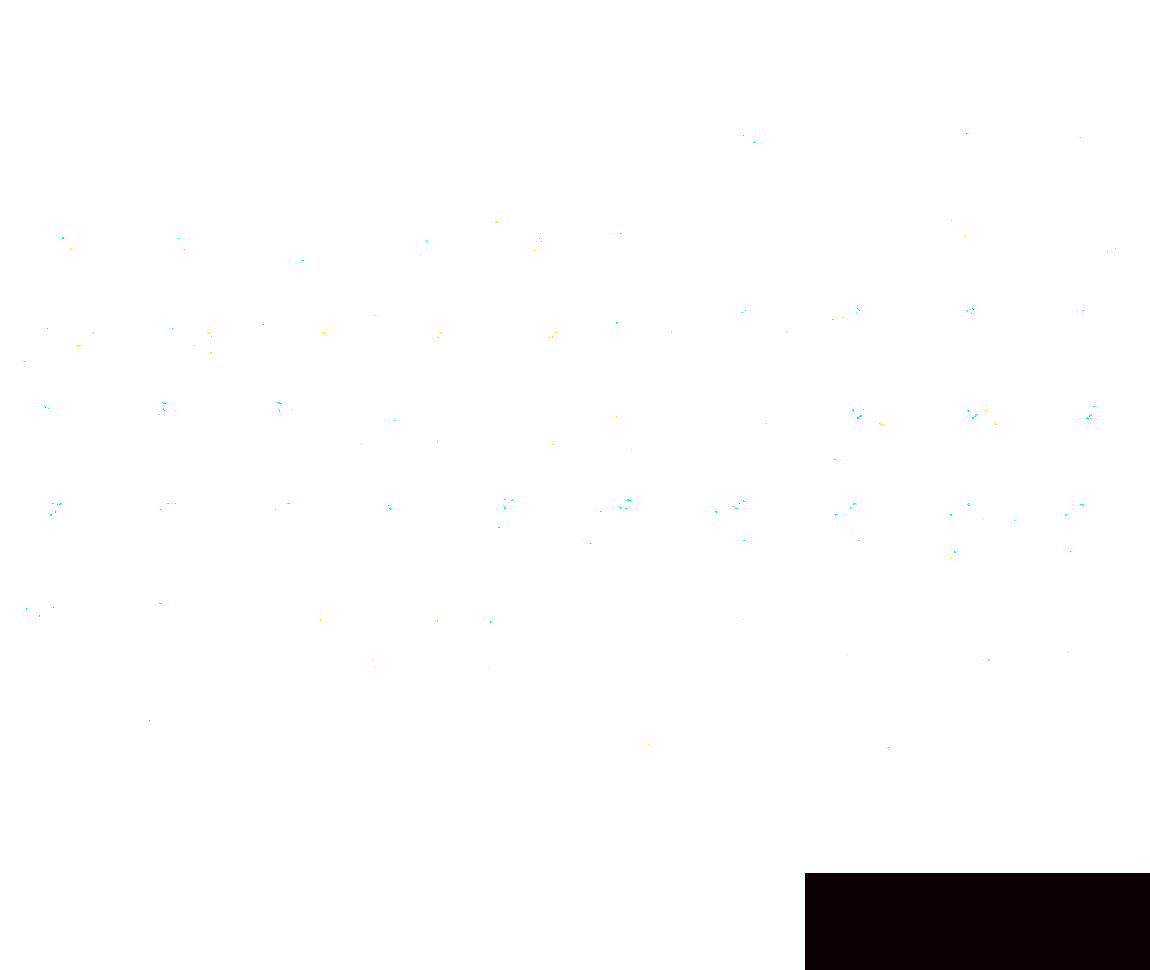

In [5]:
plotting.view_img(thresholded_map1, bg_img=ant_img, cut_coords=(0, 0, 0), title='thresholded')

In [6]:
results_clusters = get_clusters_table(thresholded_map1, stat_threshold=0.0,
                           cluster_threshold=00.0).set_index('Cluster ID', drop=True)

results_clusters['pvals'] = results_clusters['Peak Stat'].apply(lambda t_stat: scipy.stats.t.sf(abs(t_stat), df=dof))
results_clusters

,X,Y,Z,Peak Stat,Cluster Size (mm3),pvals
Cluster ID,,,,,,
1,-8.5,51.5,3.5,4.349058,64,0.000014
2,-2.5,17.5,43.5,4.168470,96,0.000028
3,-32.5,57.5,29.5,3.985158,160,0.000056
4,29.5,49.5,37.5,3.801107,48,0.000111
5,-36.5,25.5,5.5,3.764023,80,0.000126
6,29.5,-74.5,-56.5,3.707239,16,0.000155
7,-32.5,59.5,25.5,3.700786,8,0.000159
8,-30.5,51.5,21.5,3.667917,40,0.000178
9,29.5,-78.5,-40.5,3.658669,8,0.000184
